### Import Libraries

In [167]:
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import math

### Load Dataset

In [168]:
symbol = "DX-Y.NYB"
ticker = yf.Ticker(symbol)
data = ticker.history(period="5y").reset_index(drop=False)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003,0,0.0,0.0
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004,0,0.0,0.0
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-28 00:00:00-04:00,98.750000,98.949997,98.570000,98.690002,0,0.0,0.0
1254,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1255,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1256,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0


### Clean Dataset

In [169]:
cln_data = data.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
cln_data

,Date,Open,High,Low,Close
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
...,...,...,...,...,...
1253,2025-10-28 00:00:00-04:00,98.750000,98.949997,98.570000,98.690002
1254,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1255,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1256,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003


## Question 1

In [170]:
fig = px.line(cln_data, x="Date", y=["Open", "High", "Low", "Close"], title="Price of USD in last 5 years")
fig.show()

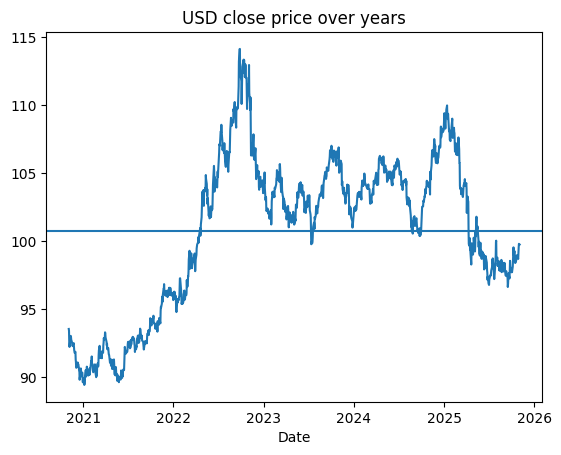

In [171]:
plt.plot(cln_data['Date'], cln_data['Close'])
plt.axhline(y=cln_data['Close'].mean())

plt.title("USD close price over years")
plt.xlabel('Date')
plt.show()

## Question 2
Και από τα 2 γραφήματα παρατηρείται ότι οι χρονοσειρές μας είναι μη-στατικές, διότι η τιμή του δολαρίου μεταβάλεται συνεχώς μακριά από το μέσο όρο του, καθώς και η τυπική απόκλιση δεν παραμένει σταθερή. Συγκεκριμένα, στο δεύτερο γράφημα που αναπαραστούμε την μέση Close τιμή του δολαρίου και την πραγματική Close τιμή του, φαίνεται ότι συνεχώς μεταβάλλεται με ανόμοιο τρόπο σε συνάρτηση με τη μέση τιμή του.

## Question 3
Εάν εκπαιδεύσουμε έναν Regressor σε μη στατικές χρονοσειρές, για το συγκεκριμένο πρόβλημα, κινδυνεύουμε το μοντέλο μας να παρουσιάσει υπερπροσαρμογή στα δεδομένα μας και να μην έχει καλή απόδοση. Αυτό συμβαίνει διότι οι μη στατικές χρονοσειρές έχουν μεταβολές στο μέσο όρο σε βάθος χρόνου, το οποίο σημαίνει ότι οποιαδήποτς σχέση μάθει το μοντέλο μας από τα παλιά δεδομένα δεν θα ισχύει στο μέλλον. Αν για παράδειγμα, τα δεδομένα εκπαίδευσης παρουσιάζουν συνεχείς αύξηση της τιμής του δολαρίου, το μοντέλο θα προβλέπει συνεχώς ότι η τιμή θα ανεβαίνει.

## Question 4
Παρατηρούμε ότι μεταξύ του διαστήματος Ιούνιο-Ιούλιο του 2025 η τιμή του δολαρίου σημείωσε σημαντική πτώση. Πιθανή αιτία είναι η ανακοίνωση του Donald Trump, τον Απρίλιο του 2025, για την επιβολή των δασμών στα προϊόντα που εισάγονται στις ΗΠΑ. Αυτή η δήλωση προκάλεσε αναταραχές στην οικονομική κοινότητα, η οποία αποτυπώθηκε και στην τιμή του δολαρίου την συγκεκριμένη περίοδο.

## Question 5
Απο την μία μπορούμε να δώσουμε μία όχι ακριβής πρόβλεψη για την close τιμή της επόμενης ημέρας με μία τιμή κοντά στην close τιμή της προηγούμενης ημέρας, αλλά δεδομένου ότι το πρόβλημα της πρόβλεψης της close τιμής είναι ένα forecasting πρόβλημα βασισμένο σε χρονοσειρές, και γνωρίζοντας ότι οι χρονοσειρές περιγράφονται από μία τάση, εποχικότητα, και κυκλικότητα.
Χρειαζόμαστε δεδομένα για περισσότερες από μία ημέρες για να μπορέσουμε να προσδιορίσουμε αυτά τα χαρακτηριστικά, ώστε να μπορέσουμε να έχουμε μία πιο ακριβή πρόβλεψη.

## Question 6
Με βάση τα δεδομένα μας και το στόχο που θέλουμε να πετύχουμε δεν είναι λογικό να διαχωρίσουμε τυχαία τα δεδομένα μας, διότι οι μελλοντικές τιμές του δολαρίου εξαρτώνται από τις παρελθοντικές. Δεν θα είχε νόημα για παράδειγμα, να κάνουμε test το μοντέλο μας για τις τιμές του 2024-01-01 όταν έχει εκπαιδευτεί και μάθει τις τιμές για 2024-01-02.

## Question 7

In [172]:
train_data = cln_data[pd.to_datetime(cln_data["Date"]).dt.date < pd.to_datetime("2024-01-01").date()].copy()
train_data = train_data.drop(columns="Date")
train_data.head(10)

,Open,High,Low,Close
0,94.050003,94.050003,93.290001,93.550003
1,93.089996,94.300003,93.089996,93.410004
2,93.339996,93.550003,92.489998,92.529999
3,92.570000,92.820000,92.180000,92.230003
4,92.239998,92.959999,92.129997,92.730003
5,92.760002,92.970001,92.599998,92.750000
6,92.699997,93.209999,92.610001,93.040001
7,93.010002,93.139999,92.779999,92.959999
8,92.949997,93.010002,92.709999,92.760002
9,92.720001,92.839996,92.459999,92.570000


In [173]:
test_data = cln_data[pd.to_datetime(cln_data["Date"]).dt.year ==  pd.to_datetime("2024-01-01").date().year].copy()
test_data = test_data.drop(columns="Date")
test_data.head(10)

,Open,High,Low,Close
794,101.419998,102.250000,101.339996,102.199997
795,102.150002,102.730003,102.080002,102.459999
796,102.459999,102.529999,102.150002,102.419998
797,102.400002,103.099998,101.910004,102.410004
798,102.440002,102.620003,102.080002,102.209999
799,102.220001,102.660004,102.110001,102.570000
800,102.480003,102.639999,102.339996,102.360001
801,102.300003,102.760002,102.160004,102.290001
802,102.300003,102.589996,102.089996,102.400002
803,102.739998,103.430000,102.739998,103.360001


## Question 8

In [174]:
def get_windows(df, N):
    x = []
    y = []
    for i in range(len(df)-(N)):
        x = np.append(x, df[i:i+N])
        y = np.append(y, df.iloc[i+N, 3])

    return x,y

## Question 9
Εάν θέλουμε να προβλέψουμε την τιμή της επόμενης ημέρας το μέγεθος του timeframe θα πρέπει να είναι μικρό, του τύπου ενός ή δύο ημερών. Αντίθετα εάν θέλουμε να προβλέψουμε τιμές σε βάθος  ενός μήνα θα πρέπει να μεγαλώσουμε αρκετά το timeframe μας ώστε το μοντέλο να προσαρμοστεί και να μάθει τις αλλαγές της τιμής σε βάθος ενός μήνα (N=30), όπου η μεταβολή της τιμής μπορεί να είναι μεγαλύτερη σε σχέση με αυτή μίας ημέρας μόνο.

## Question 10

In [175]:
x_train, y_train = get_windows(train_data, 5)
x_test, y_test = get_windows(test_data, 5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15780,) (789,)
(4940,) (247,)


In [176]:
x_train = x_train.reshape((789, 20)) # Pairnoume 20 giati to timeframe einai 5x4times=20. Opote 20820/20=1042 inputs.
x_test = x_test.reshape((247, 20))

print(x_train.shape)
print(y_train.shape)

(789, 20)
(789,)


In [177]:
print(x_train[0])
print(y_train[0])

[94.05000305 94.05000305 93.29000092 93.55000305 93.08999634 94.30000305
 93.08999634 93.41000366 93.33999634 93.55000305 92.48999786 92.52999878
 92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336]
92.75


## Question 11

In [178]:
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)

# Train error
ypred_train = linearReg.predict(x_train)
lr_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {lr_train_mae}")

# Test error
ypred_test = linearReg.predict(x_test)
lr_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {lr_test_mae}")

Mean absolute error in training set: 0.34521680961968676
Mean absolute error in test set: 0.28427943386044924


In [179]:
randomFR = RandomForestRegressor()
randomFR.fit(x_train, y_train)

# Train error
ypred_train = randomFR.predict(x_train)
rf_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {rf_train_mae}")

# Test error
ypred_test = randomFR.predict(x_test)
rf_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {rf_test_mae}")

Mean absolute error in training set: 0.14504132511346837
Mean absolute error in test set: 0.32644000157653547


In [180]:
bagReg = BaggingRegressor()
bagReg.fit(x_train, y_train)

# Train error
ypred_train = bagReg.predict(x_train)
br_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {br_train_mae}")

# Test error
ypred_test = bagReg.predict(x_test)
br_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {br_test_mae}")

Mean absolute error in training set: 0.15767676156434424
Mean absolute error in test set: 0.3541135224253543


In [181]:
xgbReg = XGBRegressor()
xgbReg.fit(x_train, y_train)

# Train error
ypred_train = xgbReg.predict(x_train)
xgbr_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {xgbr_train_mae}")

# Test error
ypred_test = xgbReg.predict(x_test)
xgbr_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {xgbr_test_mae}")

Mean absolute error in training set: 0.023514383797107692
Mean absolute error in test set: 0.3762612902683768


In [182]:
stackReg = StackingRegressor(estimators=[('lr',LinearRegression()), ('dt',DecisionTreeRegressor())])
stackReg.fit(x_train, y_train)

# Train error
ypred_train = stackReg.predict(x_train)
sr_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {sr_train_mae}")

# Test error
ypred_test = stackReg.predict(x_test)
sr_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {sr_test_mae}")

Mean absolute error in training set: 0.36260559725910685
Mean absolute error in test set: 0.2912232943060789


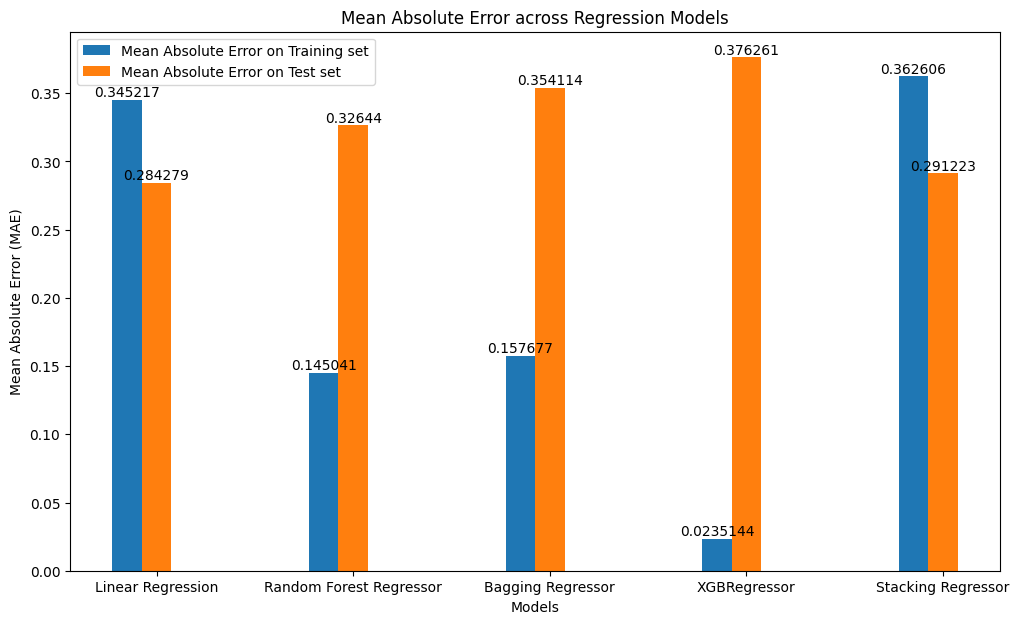

In [183]:
maes = {
            'Mean Absolute Error on Training set': (lr_train_mae, rf_train_mae, br_train_mae, xgbr_train_mae, sr_train_mae),
            'Mean Absolute Error on Test set': (lr_test_mae,rf_test_mae,br_test_mae,xgbr_test_mae,sr_test_mae),
        }
labels = ['Linear Regression', 'Random Forest Regressor', 'Bagging Regressor', 'XGBRegressor', 'Stacking Regressor']

x = np.arange(len(labels))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(12,7))
for attr, mae in maes.items():
    offset = width*multiplier
    bars = ax.bar(x+offset, mae, width, label=attr)
    ax.bar_label(bars)

    multiplier+=1

ax.set_title('Mean Absolute Error across Regression Models')
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xticks(x+width, labels)
ax.legend()

plt.show()

- Linear Regression: Προσπαθεί, με βάση την μεταβλητή x, να βρει την γραμμή που να ταιριάζει καλύτερα στα δεδομένα, με σκοπό να ελαχιστοποιεί την απόκλιση της προβλεπόμενης τιμής από την πραγματική τιμή (y).

- Random Forest Regressor: Επιλέγει ένα υποσύνολο χαρακτηριστικών και δημιουργεί πολλαπλά Δένδρα Αποφάσεων με κάθε υποσύνολο. Τέλος, λαμβάνοντας υπόψη όλα το αποτελέσματα, επιλέγει το μέσο όρο των προβλέψεων των διαφορετικών μοντέλων.

- Bagging Regressor: Αξιοποιώτας την δειγματοληψία με επανατοποθέτηση, δημιουργεί πολλά ίσου μεγέθους διαφορετικά σύνολα δεδομένων από το αρχικό. Στη συνέχεια, εφαρμόζει τον ασταθή αλγόριθμο μάθησης για να εκπαιδεύσει το μοντέλο και να εξάγει δεδομένα. Η τελική προβεπόμενη τιμή εξάγεται όπως και στα Random Forest μοντέλα μέσω του μέσου όρου των αποτελεσμάτων.

- XG-Boost Regressor: Κάνει χρήση της μεθόδου boosting όπου δημιουργεί διαδοχικά μοντέλα μάθησης (δένδρα αποφάσεων), όπου το κάθε ένα μαθαίνει και διορθώνει τα λάθη του προηγούμενου τοποθετόντας βάρη στα δεδομένα. Η διαδικασία τελειώνει όταν επιτευχθεί ένα επιθυμητό όριο σφάλματος είτε όταν ξεπεραστεί ένα προκαθορισμένο πλήθος κύκλων ενίσχυσης. Ο XGBoost συγκεκριμένα, κάνει χρήση και κάποιων ακόμα τεχνικών όπως regularization και tree-pruning με σκοπό την αποφυγή της υπερπροσαρμογής του μοντέλου.

- Stacking Regressors: Κάνει συνδυασμό πολλών μοντέλων για να παραχθεί μία προβλεπόμενη τιμή. Αρχικά παράγονται κάποια δεδομένα εκπαίδευσης από ένα σύνολο μοντέλων που αποτελόυν το πρώτο επίπεδο,και αυτά τροφοδοτόυνται στο τελικό μετα-μοντέλο το όποιο εξάγει την τελική απάντηση.

## Question 12

A) Είναι σημαντικό να έχουμε στα δεδομένα μας τον μήνα και την ημέρα, διότι περιέχουν πληροφορία που βοηθάει στο να προσδιοριστεί οποιαδήποτε τάση, εποχικότητα, και κυκλικότητα υπάρχει στην χρονοσειρά μας. Για παράδειγμα, μπορεί κάθε Πέμπτη ή κάθε 10 του μήνα να υπάρχει μία αύξηση στην τιμή του δολαρίου. Αυτή η πληροφορία θα περάσει στο μοντέλο μας, μόνο εάν του παρέχουμε την ημέρα και το μήνα.

In [184]:
pre_train_data = data[pd.to_datetime(data["Date"]).dt.date < pd.to_datetime("2024-01-01").date()].copy()
pre_train_data['Month'] = pd.to_datetime(data["Date"]).dt.month
pre_train_data['Day'] = pd.to_datetime(data["Date"]).dt.day
pre_train_data = pre_train_data.drop(columns=['Date','Dividends','Stock Splits'])

pre_train_data

,Open,High,Low,Close,Volume,Month,Day
0,94.050003,94.050003,93.290001,93.550003,0,11,3
1,93.089996,94.300003,93.089996,93.410004,0,11,4
2,93.339996,93.550003,92.489998,92.529999,0,11,5
3,92.570000,92.820000,92.180000,92.230003,0,11,6
4,92.239998,92.959999,92.129997,92.730003,0,11,9
...,...,...,...,...,...,...,...
789,101.760002,101.900002,101.430000,101.699997,0,12,22
790,101.650002,101.769997,101.449997,101.470001,0,12,26
791,101.550003,101.570000,100.830002,100.989998,0,12,27
792,100.870003,101.300003,100.620003,101.230003,0,12,28


In [185]:
pre_test_data = data[pd.to_datetime(data["Date"]).dt.year == pd.to_datetime("2024-01-01").date().year].copy()
pre_test_data['Month'] = pd.to_datetime(data["Date"]).dt.month
pre_test_data['Day'] = pd.to_datetime(data["Date"]).dt.day
pre_test_data = pre_test_data.drop(columns=['Date','Dividends','Stock Splits'])

pre_test_data

,Open,High,Low,Close,Volume,Month,Day
794,101.419998,102.250000,101.339996,102.199997,0,1,2
795,102.150002,102.730003,102.080002,102.459999,0,1,3
796,102.459999,102.529999,102.150002,102.419998,0,1,4
797,102.400002,103.099998,101.910004,102.410004,0,1,5
798,102.440002,102.620003,102.080002,102.209999,0,1,8
...,...,...,...,...,...,...,...
1041,108.160004,108.300003,107.919998,108.260002,0,12,24
1042,108.169998,108.300003,108.029999,108.129997,0,12,26
1043,108.080002,108.199997,107.870003,108.000000,0,12,27
1044,108.010002,108.379997,107.739998,108.129997,0,12,30


Δημιουργούμε ιστόγραμμα πριν την εφαρμογή των Λογαριθμικών Επιστροφών.

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

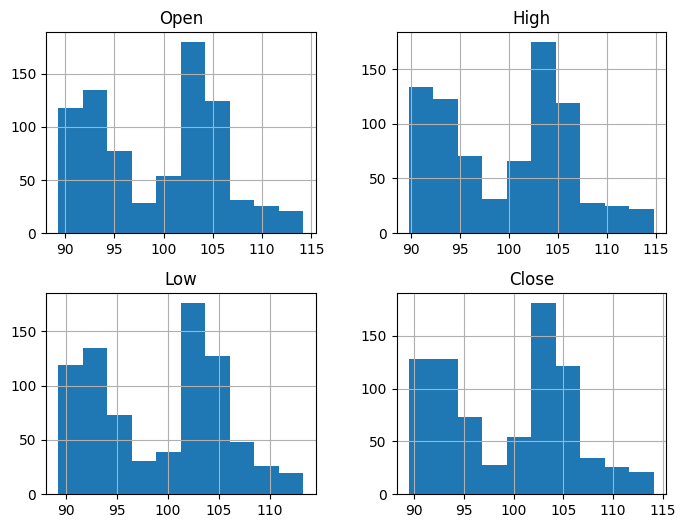

In [186]:
pre_train_data.hist(column=["Open","High","Low","Close"], bins=10, figsize=(8,6))

B) Εφαρμογή Log Returns: yt=ln⁡(yt+1/yt)
- Εφόσον η στήλη Volume είναι 0 για κάθε εγγραφή, δεν μπορούμε να εφαρμόσουμε το Log Return. Οπότε το εφαρμόζουμε στις υπόλοιπες 4 ("Open","High","Low", "Close").

In [187]:
final_train_data = pre_train_data.copy()
final_test_data = pre_test_data.copy()
for col in ["Open","High","Low", "Close"]:
    final_train_data[col] = np.log(pre_train_data[col].shift(-1)/pre_train_data[col])
    final_test_data[col] = np.log(pre_test_data[col].shift(-1)/pre_test_data[col])
final_train_data

,Open,High,Low,Close,Volume,Month,Day
0,-0.010260,0.002655,-0.002146,-0.001498,0,11,3
1,0.002682,-0.007985,-0.006466,-0.009466,0,11,4
2,-0.008284,-0.007834,-0.003357,-0.003247,0,11,5
3,-0.003571,0.001507,-0.000543,0.005407,0,11,6
4,0.005622,0.000108,0.005089,0.000216,0,11,9
...,...,...,...,...,...,...,...
789,-0.001082,-0.001277,0.000197,-0.002264,0,12,22
790,-0.000984,-0.001967,-0.006130,-0.004742,0,12,26
791,-0.006719,-0.002662,-0.002085,0.002374,0,12,27
792,0.003266,0.001184,0.004462,0.000987,0,12,28


Διαγράφουμε την τελευταία γραμμή, διότι δεν έχει επόμενη εγγραφή για να κανονικοποιηθεί, και δεν μπορούμε να κρατήσουμε κάποια εγγραφή που δεν είναι κανονικοποιημένη ενώ οι υπόλοιπες είναι.

In [188]:
final_train_data = final_train_data.iloc[:-1]
final_test_data = final_test_data.iloc[:-1]

print(final_train_data.tail(3))
print(final_test_data.tail(3))

         Open      High       Low     Close  Volume  Month  Day
790 -0.000984 -0.001967 -0.006130 -0.004742       0     12   26
791 -0.006719 -0.002662 -0.002085  0.002374       0     12   27
792  0.003266  0.001184  0.004462  0.000987       0     12   28
          Open      High       Low     Close  Volume  Month  Day
1042 -0.000832 -0.000924 -0.001482 -0.001203       0     12   26
1043 -0.000648  0.001662 -0.001206  0.001203       0     12   27
1044  0.000740  0.001844  0.001206  0.003324       0     12   30


Γ) Δημιουργία Ιστογραμμάτων

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

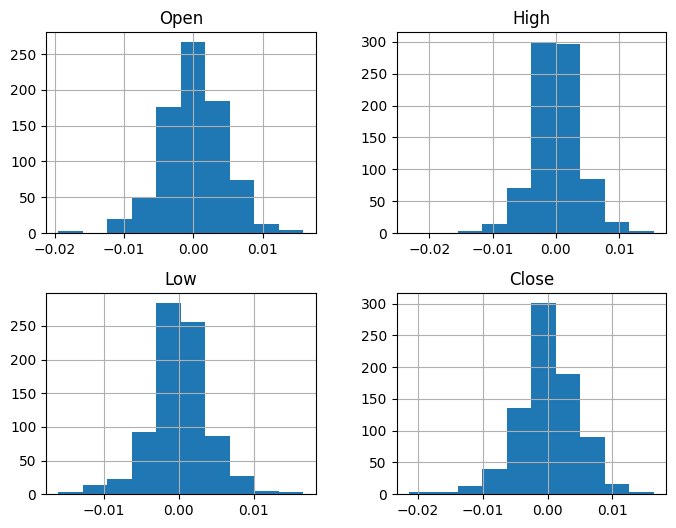

In [189]:
final_train_data.hist(column=["Open","High","Low","Close"], bins=10, figsize=(8,6))

Από τα δύο ιστογράμματα (πριν-μετά), παρατηρούμε ότι με την εφαρμογή των Λογαριθμικών Επιστροφών, τα δεδομένα μας απόκτησαν μία πιο κανονική κατανομή καθώς επίσης και όποια ακραία τιμή υπήρχε στο αρχικό σετ δεδομένων πλέον έχει ομαλοποιηθεί οπότε δεν θα επηρεάσει το ίδιο σοβαρά το μοντέλο μας κατά την εκπαίδευση. Αυτό θα βοηθησεί πολύ το μοντέλο μας να προσαρμοστεί και να μάθει τα δεδομένα μας.

Δ) Εάν ένα μοντέλο προβλέψει Ct+1=0.01, σημαίνει ότι προβλέπει θετική ποσοστιαία μεταβολή της τιμής Ct κατά 1%. Οπότε εάν η τιμή Ct=0.95 δολάρια, η απόλυτη τιμή Ct+1 ισούται με Ct+1=Ct+(Ct*0.01)=0.95+0.0095=0.9595.

Ε) Train models

In [190]:
x_train, y_train = get_windows(final_train_data, 5)
x_test, y_test = get_windows(final_test_data, 5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27580,) (788,)
(8610,) (246,)


In [191]:
x_train = x_train.reshape((788, 35)) # 27580/35=788 (7 xaraktiristika me 5 window)
x_test = x_test.reshape((246, 35))

print(x_train.shape)
print(y_train.shape)

(788, 35)
(788,)


In [192]:
print(x_train[0])
print(y_train[0])

[-1.02598604e-02  2.65463381e-03 -2.14620300e-03 -1.49764025e-03
  0.00000000e+00  1.10000000e+01  3.00000000e+00  2.68197350e-03
 -7.98513666e-03 -6.46622032e-03 -9.46554202e-03  0.00000000e+00
  1.10000000e+01  4.00000000e+00 -8.28358951e-03 -7.83395482e-03
 -3.35731687e-03 -3.24740942e-03  0.00000000e+00  1.10000000e+01
  5.00000000e+00 -3.57125898e-03  1.50715273e-03 -5.42597294e-04
  5.40658737e-03  0.00000000e+00  1.10000000e+01  6.00000000e+00
  5.62168262e-03  1.07590343e-04  5.08853187e-03  2.15620474e-04
  0.00000000e+00  1.10000000e+01  9.00000000e+00]
0.0031218165630121798


In [193]:
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)

# Train error
ypred_train = linearReg.predict(x_train)
lr_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {lr_train_mae}")

# Test error
ypred_test = linearReg.predict(x_test)
lr_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {lr_test_mae}")

Mean absolute error in training set: 0.003385788297857611
Mean absolute error in test set: 0.00288140894800495


In [194]:
bagReg = BaggingRegressor()
bagReg.fit(x_train, y_train)

# Train error
ypred_train = bagReg.predict(x_train)
br_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {br_train_mae}")

# Test error
ypred_test = bagReg.predict(x_test)
br_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {br_test_mae}")

Mean absolute error in training set: 0.0014845119937673017
Mean absolute error in test set: 0.003109053299822169


In [195]:
randomFR = RandomForestRegressor()
randomFR.fit(x_train, y_train)

# Train error
ypred_train = randomFR.predict(x_train)
rf_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {rf_train_mae}")

# Test error
ypred_test = randomFR.predict(x_test)
rf_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {rf_test_mae}")

Mean absolute error in training set: 0.0013381941005181515
Mean absolute error in test set: 0.0028349686509637887


In [196]:
xgbReg = XGBRegressor()
xgbReg.fit(x_train, y_train)

# Train error
ypred_train = xgbReg.predict(x_train)
xgbr_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {xgbr_train_mae}")

# Test error
ypred_test = xgbReg.predict(x_test)
xgbr_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {xgbr_test_mae}")

Mean absolute error in training set: 0.0005669608017936007
Mean absolute error in test set: 0.0032611252907437938


In [197]:
stackReg = StackingRegressor(estimators=[('lr',LinearRegression()), ('dt',DecisionTreeRegressor())])
stackReg.fit(x_train, y_train)

# Train error
ypred_train = stackReg.predict(x_train)
sr_train_mae = mean_absolute_error(y_train, ypred_train)
print(f"Mean absolute error in training set: {sr_train_mae}")

# Test error
ypred_test = stackReg.predict(x_test)
sr_test_mae = mean_absolute_error(y_test, ypred_test)
print(f"Mean absolute error in test set: {sr_test_mae}")

Mean absolute error in training set: 0.0034511825243623293
Mean absolute error in test set: 0.002716778676276212


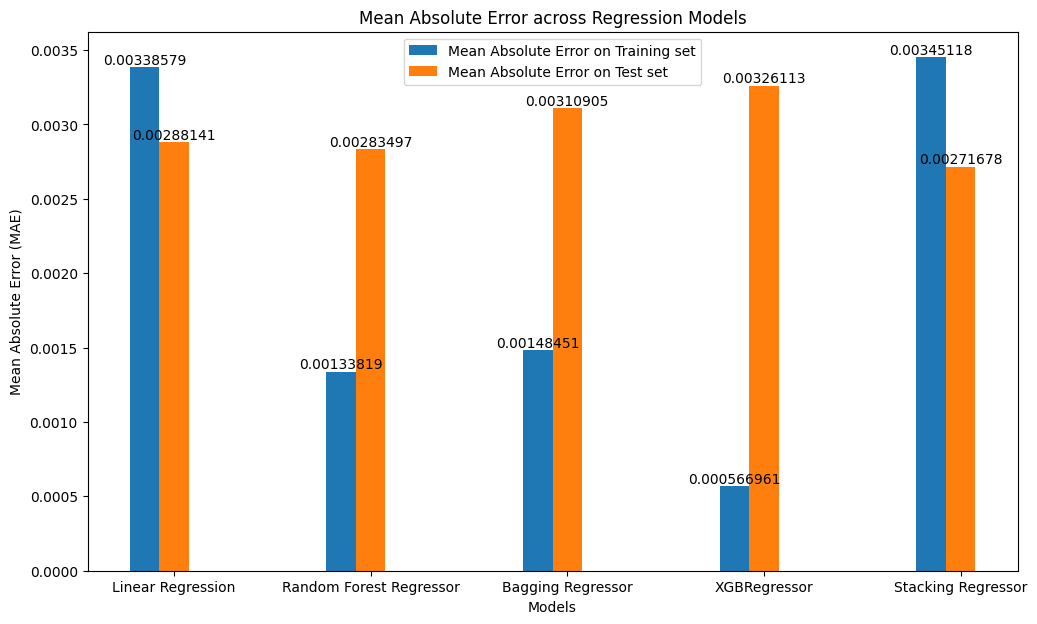

In [198]:
maes = {
            'Mean Absolute Error on Training set': (lr_train_mae, rf_train_mae, br_train_mae, xgbr_train_mae, sr_train_mae),
            'Mean Absolute Error on Test set': (lr_test_mae,rf_test_mae,br_test_mae,xgbr_test_mae,sr_test_mae),
        }
labels = ['Linear Regression', 'Random Forest Regressor', 'Bagging Regressor', 'XGBRegressor', 'Stacking Regressor']

x = np.arange(len(labels))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(12,7))
for attr, mae in maes.items():
    offset = width*multiplier
    bars = ax.bar(x+offset, mae, width, label=attr)
    ax.bar_label(bars)

    multiplier+=1

ax.set_title('Mean Absolute Error across Regression Models')
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xticks(x+width, labels)
ax.legend()

plt.show()

Παρατηρούμε ότι το ποσοστό λάθους έπεσε από 30% περίπου στο 0.3% περίπου.

## Question 13

In [199]:
y_pred = stackReg.predict(x_test)
predicted_prices = abs(pre_test_data["Close"].iloc[6:] + pre_test_data["Close"].iloc[6:]*y_pred)    # Xekiname apo tin 6i eggrafi giati to window=5 kai den yparxei target value gia tis prwtes 5

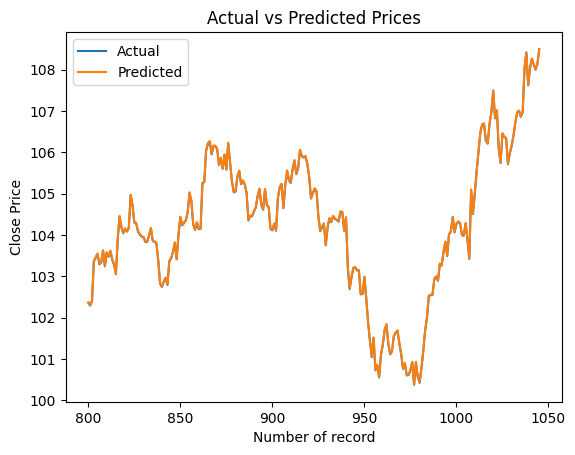

In [200]:
plt.plot(pre_test_data["Close"].iloc[6:], label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.xlabel('Number of record')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()